## Reproduce Fig. 2c
The full TSNE takes hours to run. For ease of use, the resulting embedded coordinates have been saved and the default will be to load these to make the graphic, with code to optionally rerun at the bottom of the notebook.

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE SLOW!!
from MulticoreTSNE import MulticoreTSNE as TSNE
import umap
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import sys
import random
import os
import Levenshtein
import pickle
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names, save_for_pub, label_point
from common.embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)

In [2]:
data = pd.DataFrame(np.load("../../data/full_SCOP_nodup_seqs_nonan.npy"))
data

,0,1,2,3,4
0,LLEEEESSLEELSSSSBLEELTTLEEEEEELSSSSEEEEELTTTLL...,b.34.2.1,"[0.03249254822731018, 0.008315115235745907, 0....",1A0N_d1a0nb-,VTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGE...
1,LLSSLLSSHHHHHHHHHHHHHHHTLLLLLLLLLLLLLLLLLLLLLL...,c.47.1.6,"[0.005940452218055725, -0.058152876794338226, ...",1A0R_d1a0rp-,FEGQASHTGPKGVINDWRKFKLESEDSDSVAHSKKEILRQMSSPQS...
2,LLSLSSLBLLLLGGGEEEEEEEEETTTEEEEEEEETTTLLEEEELT...,d.9.1.1,"[0.01415212545543909, -0.06227957829833031, 0....",1A15_d1a15b-,RCPCRFFESHVARANVKHLKILNTPACALQIVARLKNNNRQVCIDP...
3,LLLSLEEELLLBLLLLLLLLLTTLLLEETTEELLLLHHHHHHHHHH...,e.15.1.1,"[0.005544827785342932, -0.054513003677129745, ...",1A31_d1a31a2,IKWKFLEHKGPVFAPPYEPLPENVKFYYDGKVMKLSPKAEEVATFF...
4,LLGGGLLLLTTLLHHHHHHHHHHHHHHTTLLHHHHHHHHHTHHHHT...,a.28.3.1,"[0.013277050107717514, -0.04450679570436478, 0...",1A43_d1a43a-,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...
5,LTHHHHHHHHHTTLHHHHHHHHHHHSLLLLLHHHHSGGGGGGLSLT...,c.45.1.2,"[0.011965986341238022, -0.05434071645140648, 0...",1A5Y_d1a5ya-,EMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYR...
6,LLTTTGGGGGTHHHHHHHHHHTTSLLLTEEEEEEELLSHHHHHHHH...,c.2.1.1,"[0.03303977847099304, 0.08438586443662643, 0.1...",1A72_d1a72a2,SPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGAGLSVIM...
7,LSSLLLSSSLEEEEELLLTTSLTTLTTGGGSHHHHTTLLSSLEEEE...,b.52.2.2,"[0.006959179416298866, -0.03545509651303291, 0...",1AA6_d1aa6a1,PIDKLTDEYPMVLSTVREVGHYSCRSMTGNCAALAALADEPGYAQI...
8,LLLHHHHHHHHHHHHHHHHHTTLHHHHHHHHHHHHHHHTSHHHHHH...,a.70.1.1,"[0.008577513508498669, 0.0025573214516043663, ...",1ABV_d1abva-,SEFITVARPYAKAAFDFAVEHQSVERWQDMLAFAAEVTKNEQMAEL...
9,SLTTTGGGGGTHHHHHHHHHHTTSLLLTTLEEEEELLSHHHHHHHH...,c.2.1.1,"[0.031638409942388535, 0.1374419629573822, 0.1...",1ADF_d1adfa2,SPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIM...


In [3]:
data.columns = ["DSSP", "SCOPid", "avg_hidden", "name", "seq"]
data

,DSSP,SCOPid,avg_hidden,name,seq
0,LLEEEESSLEELSSSSBLEELTTLEEEEEELSSSSEEEEELTTTLL...,b.34.2.1,"[0.03249254822731018, 0.008315115235745907, 0....",1A0N_d1a0nb-,VTLFVALYDYEARTEDDLSFHKGEKFQILNSSEGDWWEARSLTTGE...
1,LLSSLLSSHHHHHHHHHHHHHHHTLLLLLLLLLLLLLLLLLLLLLL...,c.47.1.6,"[0.005940452218055725, -0.058152876794338226, ...",1A0R_d1a0rp-,FEGQASHTGPKGVINDWRKFKLESEDSDSVAHSKKEILRQMSSPQS...
2,LLSLSSLBLLLLGGGEEEEEEEEETTTEEEEEEEETTTLLEEEELT...,d.9.1.1,"[0.01415212545543909, -0.06227957829833031, 0....",1A15_d1a15b-,RCPCRFFESHVARANVKHLKILNTPACALQIVARLKNNNRQVCIDP...
3,LLLSLEEELLLBLLLLLLLLLTTLLLEETTEELLLLHHHHHHHHHH...,e.15.1.1,"[0.005544827785342932, -0.054513003677129745, ...",1A31_d1a31a2,IKWKFLEHKGPVFAPPYEPLPENVKFYYDGKVMKLSPKAEEVATFF...
4,LLGGGLLLLTTLLHHHHHHHHHHHHHHTTLLHHHHHHHHHTHHHHT...,a.28.3.1,"[0.013277050107717514, -0.04450679570436478, 0...",1A43_d1a43a-,TSILDIRQGPKEPFRDYVDRFYKTLRAEQASQEVKNWMTETLLVQN...
5,LTHHHHHHHHHTTLHHHHHHHHHHHSLLLLLHHHHSGGGGGGLSLT...,c.45.1.2,"[0.011965986341238022, -0.05434071645140648, 0...",1A5Y_d1a5ya-,EMEKEFEQIDKSGSWAAIYQDIRHEASDFPCRVAKLPKNKNRNRYR...
6,LLTTTGGGGGTHHHHHHHHHHTTSLLLTEEEEEEELLSHHHHHHHH...,c.2.1.1,"[0.03303977847099304, 0.08438586443662643, 0.1...",1A72_d1a72a2,SPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGAGLSVIM...
7,LSSLLLSSSLEEEEELLLTTSLTTLTTGGGSHHHHTTLLSSLEEEE...,b.52.2.2,"[0.006959179416298866, -0.03545509651303291, 0...",1AA6_d1aa6a1,PIDKLTDEYPMVLSTVREVGHYSCRSMTGNCAALAALADEPGYAQI...
8,LLLHHHHHHHHHHHHHHHHHTTLHHHHHHHHHHHHHHHTSHHHHHH...,a.70.1.1,"[0.008577513508498669, 0.0025573214516043663, ...",1ABV_d1abva-,SEFITVARPYAKAAFDFAVEHQSVERWQDMLAFAAEVTKNEQMAEL...
9,SLTTTGGGGGTHHHHHHHHHHTTSLLLTTLEEEEELLSHHHHHHHH...,c.2.1.1,"[0.031638409942388535, 0.1374419629573822, 0.1...",1ADF_d1adfa2,SPLEKVCLIGCGFSTGYGSAVKVAKVTQGSTCAVFGLGGVGLSVIM...


In [4]:
data["class"] = data.SCOPid.map(lambda s: str(s).split('.')[0])
data['class'].value_counts()

b    8102
c    6651
d    6318
a    4887
g    1322
f     380
e     365
Name: class, dtype: int64

In [5]:
data = data[~data['class'].isin(["d","e"])]

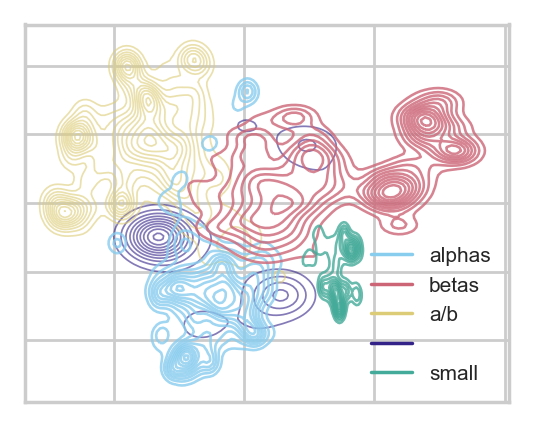

In [6]:
components = np.load("../../data/tsne_p600_r42_no_d_e.npy")
set_pub_plot_context(context="paper")
fig = plt.figure(figsize=(2.5,2), dpi=250)
ax = fig.add_subplot(111)

#colors = ["Blues", "Greens", "Reds", "Purples", "Oranges", "Greys", "pink"]
label_order = [ 
    "a",
    "b",
    "c",
    "f",
    "g"]

colors = {
    "a":sns.color_palette()[0],
    "b":sns.color_palette()[1],
    "c":sns.color_palette()[2],
    "d":sns.color_palette()[8],
    "e":sns.color_palette()[5],
    "f":sns.color_palette()[4],
    "g":sns.color_palette()[6],
}
pretty_names = {
    "a":"alphas",
    "b":"betas",
    "c":"a/b",
    "d":"a+b",
    "e":"Multi domain",
    "f":" ",
    "g":"small",
}
lw = [.4,.45,.5,.55,.6,.7,1,1.5,2,3,5]
colorpal = [colors[o] for o in label_order]
#print(colors)
"""
for i,cl in enumerate(data['class'].unique()):
    mask = data['class'] == cl
    x = components[mask,0]
    y = components[mask,1]
    ax.scatter(x=x,y=y,s=1, c=colorpal[i])
"""
for i,cl in enumerate(label_order):
    mask = data['class'] == cl
    x = components[mask,0]
    y = components[mask,1]
    if cl == "a" or cl == "b" or cl == "g":
        sns.kdeplot(x,y,shade=False, label=cl, 
                colors=[colorpal[i]], cmap=None, linewidths=.75, alpha=.8, zorder=100)
    elif cl == "c":
        sns.kdeplot(x,y,shade=False, label=cl, 
                colors=[colorpal[i]], cmap=None, linewidths=.5, alpha=.6, zorder=50)
    else:
        sns.kdeplot(x,y,shade=False, label=cl, 
                colors=[colorpal[i]], cmap=None, linewidths=.5, alpha=.6)

custom_lines = [
    Line2D([0], [0], color=colors[o], lw=1) for o in label_order
]
ax.legend(custom_lines, [pretty_names[o] for o in label_order], loc="lower right", fontsize=6)
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
save_for_pub(fig=fig, path='./img/c', dpi=500)

The below will reproduce the saved TSNE components. Will appear interrupted because of long runtime.

In [7]:
tsne = TSNE(n_jobs=16,perplexity=600, random_state=42)

In [8]:
components = tsne.fit_transform(np.array(data.avg_hidden.tolist()))

KeyboardInterrupt: 

In [ ]:
np.save("../../data/tsne_p600_r42_no_d_e.npy", components)